# 5. Miscellaneous - Testing of Models and Methods that Ultimately Did Not Yield Results
#### Angela Jiang, Alexander Lin, Jason Shen

#### Note: This notebook has not been organized or edited but is provided as a rough documentation of our experimentation with additional methods and models. The notebook will not run correctly, as the code was consolidated from many of our scratch work notebooks and has not been organized.

# Binning

In [ ]:
filtered_df = pd.read_excel('10_year_filtered_data.xlsx')

In [17]:
#### BINNING BY WEEK: now have filtered_binned_df
from datetime import datetime

# 2006-12-06 is first date, 2006-12-04 is the first monday, 2016-11-21 is last date
filtered_binned_df = pd.DataFrame(columns=('year_start', 'month_start', 'day_start', 'year_end', 'month_end', 'day_end', 'week_num', 
                                           'index_start', 'index_end'))

# relies on filtered_df being in order
current_week = filtered_df.iloc[0]['pub_date'].isocalendar()[1]
week_indices = []
df_index = 0
none_count = 0
month_start = 12
day_start = 4
year_start = 2006

for i in range(filtered_df.shape[0]):
    _, week_of_date, _ = filtered_df.iloc[i]['pub_date'].isocalendar()
    
    if week_of_date == current_week:
        week_indices += [i]
    else:
        if len(week_indices) == 0:
            index_start = None
            index_end = None
            none_count += 1
        else:
            index_start = np.min(week_indices)
            index_end = np.max(week_indices)
            
        # find month and day end of stock prices (one week)
        end_date = (datetime(year_start, month_start, day_start) + timedelta(days = 8))
        nearest_biz_day_end_date = find_nearest_biz_day(stock_price, end_date, 'before')
        year_end = nearest_biz_day_end_date.year
        month_end = nearest_biz_day_end_date.month
        day_end = nearest_biz_day_end_date.day
        
        filtered_binned_df.loc[df_index] = [year_start, month_start, day_start, year_end, month_end, day_end, week_of_date,
                                            index_start, index_end]
        
        # update start dates
        year_start = year_end
        day_start = day_end
        month_start = month_end
        
        # update current week
        current_week = week_of_date
        # first index in week indices
        week_indices = [i]
        df_index += 1
        
filtered_binned_df = filtered_binned_df.astype(int)

In [18]:
print none_count
filtered_binned_df.head()

0


,year_start,month_start,day_start,year_end,month_end,day_end,week_num,index_start,index_end
0,2006,12,4,2006,12,11,50,0,2
1,2006,12,11,2006,12,18,51,3,4
2,2006,12,18,2006,12,22,52,5,5
3,2006,12,22,2006,12,29,1,6,10
4,2006,12,29,2007,1,5,2,11,13


In [19]:
# calculate price diff per week
price_diff = []
for i in range(filtered_binned_df.shape[0]):
    result = filtered_binned_df.iloc[i]
    start_date = datetime(result['year_start'], result['month_start'], result['day_start'])
    end_date = datetime(result['year_end'], result['month_end'], result['day_end'])
    
    stock_p_start = stock_price[stock_price['date'] == start_date]['close'].values
    stock_p_end = stock_price[stock_price['date'] == end_date]['close'].values
    price_diff += [stock_p_end[0] - stock_p_start[0]]

In [20]:
# add as column to filtered_binned_df
filtered_binned_df['price_diff'] = pd.Series(np.array(price_diff), index = filtered_binned_df.index)

In [21]:
filtered_binned_df.head(n = 100)

,year_start,month_start,day_start,year_end,month_end,day_end,week_num,index_start,index_end,price_diff
0,2006,12,4,2006,12,11,50,0,2,-0.3385
1,2006,12,11,2006,12,18,51,3,4,-0.4686
2,2006,12,18,2006,12,22,52,5,5,-0.4671
3,2006,12,22,2006,12,29,1,6,10,0.3771
4,2006,12,29,2007,1,5,2,11,13,0.0300
5,2007,1,5,2007,1,12,3,14,23,1.3671
6,2007,1,12,2007,1,19,6,24,26,-0.8742
7,2007,1,19,2007,1,26,7,27,31,-0.4458
8,2007,1,26,2007,2,2,8,32,33,-0.0900
9,2007,2,2,2007,2,9,9,34,34,-0.2114


In [22]:
# bin corresponding bag of words indices (indicated by filtered_binned_df)
bag_words_binned = np.zeros((filtered_binned_df.shape[0], bag_words.shape[1]))
for i in range(filtered_binned_df.shape[0]):
    result = filtered_binned_df.iloc[i]
    index_start = int(result['index_start'])
    index_end = int(result['index_end'])
    bag_words_binned[i, :] = np.sum(bag_words[index_start:(index_end + 1), :], axis = 0) / (index_end - index_start + 1)

In [23]:
# pretty elementary auto-regression 
# (https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=autoregression)
prev_price_diff = np.reshape(filtered_binned_df['price_diff'].values[:-1], (filtered_binned_df.shape[0] - 1, 1))
first_price_diff = np.reshape(filtered_binned_df.iloc[0]['price_diff'], (1, 1))
prev_price_diff = np.concatenate((first_price_diff, prev_price_diff), axis = 0)
print prev_price_diff.shape

(443L, 1L)


In [24]:
# add previous price difference as a predictor along with bag of words
auto_reg_bag_words_binned = np.concatenate((bag_words_binned, prev_price_diff), axis = 1)

# PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
## vectorized_1gram
pca = PCA(n_components = 1)
pca.fit(vectorized_1gram)

# project to the data onto the two axes
bag_words_pca_1gram = pca.transform(vectorized_1gram)

In [240]:
## vectorized_2gram
pca = PCA(n_components = 2)
pca.fit(vectorized_2gram)

# project to the data onto the two axes
bag_words_pca_2gram = pca.transform(vectorized_2gram)
bag_words_pca = bag_words_pca_2gram

In [160]:
bigram_vectorizer = CountVectorizer(ngram_range=(3, 3),
                                    token_pattern=r'\b\w+\b')

vectorized_3gram = bigram_vectorizer.fit_transform(filtered_df['headline']).toarray()
## vectorized_2gram
pca = PCA(n_components = 3)
pca.fit(vectorized_3gram)

# project to the data onto the two axes
bag_words_pca_3gram = pca.transform(vectorized_3gram)
bag_words_pca = bag_words_pca_3gram

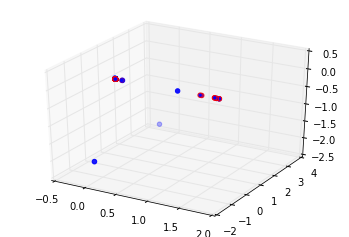

In [159]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(bag_words_pca_3gram[y == 0, 0], bag_words_pca_3gram[y == 0, 1], bag_words_pca_3gram[y == 0, 2], color = 'b', label = 'No change/decrease')
ax.scatter(bag_words_pca_3gram[y == 1, 0], bag_words_pca_3gram[y == 1, 1], bag_words_pca_3gram[y == 1, 2], color = 'r', label = 'Increase')

In [41]:
## auto_reg_bag_words_binned (add auto regression predictor first, then do PCA)
pca = PCA(n_components = 1)
pca.fit(auto_reg_bag_words_binned)

# project to the data onto the two axes
auto_reg_bag_words_binned_pca = pca.transform(auto_reg_bag_words_binned)

In [42]:
## bag_words_binned (do PCA first, then add auto regression predictor)
pca = PCA(n_components = 1)
pca.fit(bag_words_binned)

# project to the data onto the two axes
bag_words_binned_pca = pca.transform(bag_words_binned)
bag_words_binned_pca = np.concatenate((bag_words_binned_pca, prev_price_diff), axis = 1)

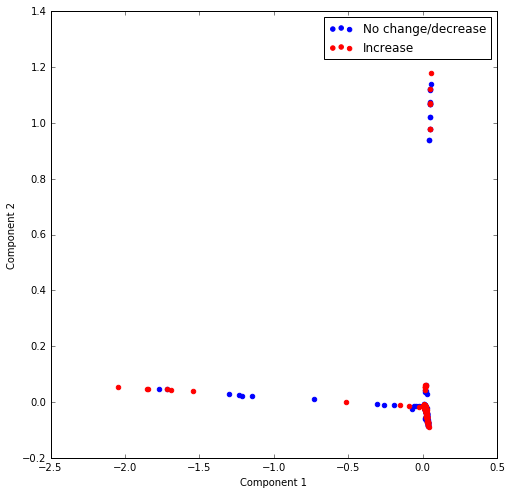

In [153]:
# visualize reduced data
y = filtered_df['y'].values
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(bag_words_pca[y == 0, 0], bag_words_pca[y == 0, 1], color = 'b', label = 'No change/decrease')
ax.scatter(bag_words_pca[y == 1, 0], bag_words_pca[y == 1, 1], color = 'r', label = 'Increase')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('')
ax.legend(loc = 'best')
plt.show()

# Regression after binning: Lasso and Ridge CV

In [43]:
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.preprocessing import StandardScaler as Standardize
import sys

In [49]:
""" reg = 'lasso' or 'ridge'
    pca = True or False
    num_folds = # folds for CV 
    Runs CV, iterating through alpha (regularization parameter)"""
def run_cross_val(x_train, y_train, reg, num_folds, pca):
    # parameters for tuning
    if pca == False:
        start_power = -2
    else:
        start_power = -10
    alphas = 10.0 ** np.arange(start_power, 15, 1) 

    # to keep track of the best model
    best_score = -sys.maxint - 1

    # run grid search for model with n-fold cross validation
    print '{}-fold cross validation for {} regression:'.format(num_folds, reg)

    # iterate through trees and depths
    for alpha_val in alphas:
        # cross validation for every experiment
        k_folds = KFold(x_train.shape[0], n_folds = num_folds, shuffle = True)
        scores = []

        # for each fold
        for train_indices, validation_indices in k_folds:
            # generate training data
            x_train_cv = x_train[train_indices]
            y_train_cv = y_train[train_indices]
            # generate validation data
            x_validate = x_train[validation_indices]
            y_validate = y_train[validation_indices]

            # fit regression on training data
            if reg == 'lasso':
                lasso_reg = Lasso_Reg(alpha = alpha_val)
                lasso_reg.fit(x_train_cv, y_train_cv)
                # record score on validation data
                score = lasso_reg.score(x_validate, np.array(y_validate))
            elif reg == 'ridge':
                # Standardize data
                x_train_cv_std = Standardize(with_mean=False).fit_transform(x_train_cv)
                x_validate_std = Standardize(with_mean=False).fit_transform(x_validate)

                ridge_reg = Ridge_Reg(alpha = alpha_val)
                ridge_reg.fit(x_train_cv_std, y_train_cv)
                # record score on validation data
                score = ridge_reg.score(x_validate_std, np.array(y_validate))
                
            scores += [score]

        average_score = np.mean(scores)

        # update our record of the best parameters see so far
        if average_score >= best_score:
            print "[BEST] Alpha:", alpha_val, "\tScore:", average_score
            best_score = average_score
            best_alpha = alpha_val
        else:
            print "Alpha:", alpha_val, "\tScore:", average_score
            
    return best_alpha

In [50]:
## regression - NO BINNING (4 options for bag_to_use)

# bag_to_use = np.array(vectorized_1gram, dtype = float)
# bag_to_use = np.array(vectorized_2gram, dtype = float)
# bag_to_use = bag_words_pca_1gram
bag_to_use = bag_words_pca_2gram

x_train, x_test, y_train, y_test = train_test_split(bag_to_use,
                                                    filtered_df['price_diff'].values,
                                                    test_size = 0.4,
                                                    random_state = 42)

In [51]:
## regression - BINNING (3 options for bag_to_use)

# bag_to_use = auto_reg_bag_words_binned
# bag_to_use = auto_reg_bag_words_binned_pca
bag_to_use = bag_words_binned_pca

x_train, x_test, y_train, y_test = train_test_split(bag_to_use,
                                                    filtered_binned_df['price_diff'].values,
                                                    test_size = 0.4,
                                                    random_state = 42)

In [52]:
# CV lasso
best_alpha = run_cross_val(x_train, y_train, 'lasso', num_folds = 4, pca = True)

# Fit and evaluate using best_alpha from CV
lasso_reg = Lasso_Reg(alpha = best_alpha)
lasso_reg.fit(x_train, y_train)
print lasso_reg.score(x_train, y_train)
print lasso_reg.score(x_test, y_test)

4-fold cross validation for lasso regression:
[BEST] Alpha: 1e-10 	Score: -0.0264890491686
Alpha: 1e-09 	Score: -0.0455041659247
[BEST] Alpha: 1e-08 	Score: -0.0196837355314
[BEST] Alpha: 1e-07 	Score: -0.00392598887634
Alpha: 1e-06 	Score: -0.0387440347506
Alpha: 1e-05 	Score: -0.0278661917283
Alpha: 0.0001 	Score: -0.0189818362363
Alpha: 0.001 	Score: -0.0318711412972
[BEST] Alpha: 0.01 	Score: -0.00178073447156
Alpha: 0.1 	Score: -0.0285602974957
Alpha: 1.0 	Score: -0.0427534846964
Alpha: 10.0 	Score: -0.00779799434324
Alpha: 100.0 	Score: -0.0124818271785
Alpha: 1000.0 	Score: -0.0130242530852
Alpha: 10000.0 	Score: -0.0128734886032
Alpha: 100000.0 	Score: -0.0161876184974
Alpha: 1000000.0 	Score: -0.0064269439319
Alpha: 10000000.0 	Score: -0.0211374381721
Alpha: 100000000.0 	Score: -0.0311019117437
Alpha: 1000000000.0 	Score: -0.0101058019346
[BEST] Alpha: 10000000000.0 	Score: -0.0012895921746
Alpha: 100000000000.0 	Score: -0.00728503451899
Alpha: 1e+12 	Score: -0.006591530872
Al

In [53]:
# CV ridge
best_alpha = run_cross_val(x_train, y_train, 'ridge', num_folds = 4, pca = True)

# Standardize data
x_train_std = Standardize(with_mean=False).fit_transform(x_train)
x_test_std = Standardize(with_mean=False).fit_transform(x_test)

# Ridge regression: Fit and evaluate using best_alpha from CV
ridge_reg = Ridge_Reg(alpha = best_alpha)
ridge_reg.fit(x_train_std, y_train)
print ridge_reg.score(x_train_std, y_train)
print ridge_reg.score(x_test_std, y_test)

4-fold cross validation for ridge regression:
[BEST] Alpha: 1e-10 	Score: -0.0342850478912
[BEST] Alpha: 1e-09 	Score: -0.0329393270005
Alpha: 1e-08 	Score: -0.0726484580608
Alpha: 1e-07 	Score: -0.0460974055104
Alpha: 1e-06 	Score: -0.0443911026306
[BEST] Alpha: 1e-05 	Score: -0.0322458565986
[BEST] Alpha: 0.0001 	Score: -0.0187032781404
Alpha: 0.001 	Score: -0.0214263764741
[BEST] Alpha: 0.01 	Score: 0.00267071134748
Alpha: 0.1 	Score: -0.0308087256594
Alpha: 1.0 	Score: -0.105092894537
Alpha: 10.0 	Score: -0.000681115454853
Alpha: 100.0 	Score: -0.00984721978926
Alpha: 1000.0 	Score: -0.058013274825
Alpha: 10000.0 	Score: -0.0109885290645
Alpha: 100000.0 	Score: -0.0187122519445
Alpha: 1000000.0 	Score: -0.00670915778965
Alpha: 10000000.0 	Score: -0.04540882417
Alpha: 100000000.0 	Score: -0.036871647619
Alpha: 1000000000.0 	Score: -0.0357285907005
Alpha: 10000000000.0 	Score: -0.0221030734852
Alpha: 100000000000.0 	Score: -0.0634115390855
Alpha: 1e+12 	Score: -0.0273431343045
Alpha:

# Classification

In [55]:
""" Function that computes the accuracy a given model on the entire test set, 
    the accuracy on class 0 in the test set
    and the accuracy on class 1 in the test set. 
    Returns a pandas Series """
def score(model, x_test, y_test): 
    accuracy_overall = model.score(x_test, y_test)
    accuracy_class0 = model.score(x_test[y_test == 0], y_test[y_test == 0])
    accuracy_class1 = model.score(x_test[y_test == 1], y_test[y_test == 1])
    return pd.Series([accuracy_overall, accuracy_class0, accuracy_class1],
                     index=['Overall accuracy', 'Accuracy on class 0', 'Accuracy on class 1'])

In [241]:
# classification
bag_to_use = bag_words_pca

x_train, x_test, y_train, y_test = train_test_split(bag_to_use, 
                                                    filtered_df['y'].values, 
                                                    test_size = 0.4, 
                                                    random_state = 42)

ones_train = y_train[y_train == 1].shape[0]
zeros_train = y_train[y_train == 0].shape[0]
# twos_train = y_train[y_train == 2].shape[0]

zeros_test = y_test[y_test == 0].shape[0]
ones_test = y_test[y_test == 1].shape[0]
# twos_test = y_test[y_test == 2].shape[0]

# print 'Twos Count - Train: ', twos_train
print 'Ones Count - Train: ', ones_train
print 'Zeros Count - Train: ', zeros_train
# print 'Twos Count - Test: ', twos_train
print 'Ones Count - Test: ', ones_test
print 'Zeros Count - Test: ', zeros_test

y_pos = np.zeros(x_test.shape[0]) + 1
y_neg = np.zeros(x_test.shape[0])
print 'Negative baseline:', float(zeros_test)/(ones_test + zeros_test)
print 'Positive baseline:', float(ones_test)/(ones_test + zeros_test)

Ones Count - Train:  354
Zeros Count - Train:  504
Ones Count - Test:  238
Zeros Count - Test:  334
Negative baseline: 0.583916083916
Positive baseline: 0.416083916084


In [ ]:
regularization = 10.**np.arange(-20, 20)
logistic = LogRegCV(cv=4, 
                    penalty='l2', 
                    Cs=regularization, 
                    solver='liblinear', 
                    class_weight = 'balanced',
                    n_jobs=1,
                   random_state = 42)
logistic.fit(x_train, y_train)
print 'Train:', score(logistic, x_train, np.array(y_train)).values
print 'Test:', score(logistic, x_test, np.array(y_test)).values

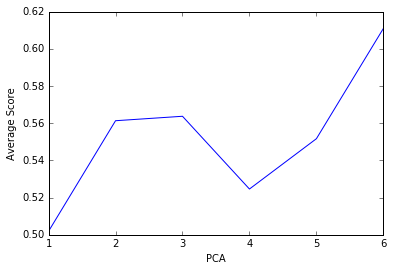

In [218]:
plt.plot(range(1,7), pca_score_results[:,0])
plt.xlabel('PCA')
plt.ylabel('Average Score')
plt.show()

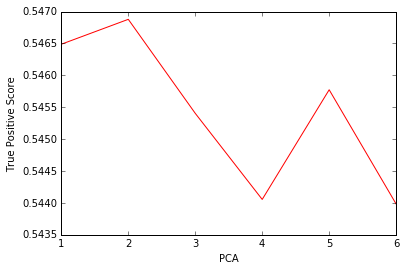

In [219]:
plt.plot(range(1,7), pca_score_results[:,1], c='r')
plt.xlabel('PCA')
plt.ylabel('True Positive Score')
plt.show()

# Misc

In [487]:
years = range(2006, 2017)
month_limits = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
for year in years:
    filtered_year_df = filtered_df[(filtered_df['pub_date'] >= str(year) + '-01-01') & (filtered_df['pub_date'] <= str(year) + '-12-31')]
    print 'Filtered ({}): {}'.format(year, filtered_year_df.shape[0])
    for month in range(1, 13):
        month_limit = month_limits[month - 1]
        if year % 4 == 0 and month == 2:
            month_limit += 1
        filtered_month_df = filtered_df[(filtered_df['pub_date'] >= str(year) + '-' + str(month) + '-01') & (filtered_df['pub_date'] <= str(year) +  '-' + str(month) + '-' + str(month_limit))]
        print '{}/{}: {}'.format(month, year, filtered_month_df.shape[0])

Filtered (2006): 11
1/2006: 0
2/2006: 0
3/2006: 0
4/2006: 0
5/2006: 0
6/2006: 0
7/2006: 0
8/2006: 0
9/2006: 0
10/2006: 0
11/2006: 0
12/2006: 11
Filtered (2007): 158
1/2007: 16
2/2007: 8
3/2007: 6
4/2007: 13
5/2007: 5
6/2007: 22
7/2007: 17
8/2007: 12
9/2007: 11
10/2007: 16
11/2007: 20
12/2007: 12
Filtered (2008): 119
1/2008: 15
2/2008: 3
3/2008: 9
4/2008: 7
5/2008: 4
6/2008: 4
7/2008: 15
8/2008: 12
9/2008: 13
10/2008: 14
11/2008: 15
12/2008: 8
Filtered (2009): 152
1/2009: 17
2/2009: 10
3/2009: 10
4/2009: 15
5/2009: 11
6/2009: 18
7/2009: 6
8/2009: 10
9/2009: 13
10/2009: 10
11/2009: 19
12/2009: 13
Filtered (2010): 148
1/2010: 12
2/2010: 6
3/2010: 16
4/2010: 21
5/2010: 6
6/2010: 15
7/2010: 19
8/2010: 10
9/2010: 12
10/2010: 12
11/2010: 10
12/2010: 9
Filtered (2011): 121
1/2011: 19
2/2011: 13
3/2011: 4
4/2011: 14
5/2011: 4
6/2011: 9
7/2011: 5
8/2011: 10
9/2011: 4
10/2011: 21
11/2011: 8
12/2011: 10
Filtered (2012): 132
1/2012: 20
2/2012: 9
3/2012: 9
4/2012: 8
5/2012: 11
6/2012: 10
7/2012: 10
